In [56]:
import pandas as pd
import anndata as ad

In [57]:
emb = ad.read_h5ad("../../results/TNBC/pipeline/uni/image_embedding.h5ad")

In [58]:
emb.obs["label"] = emb.obs["label"].astype(str)
emb.obs["knn_predicted_label"] = emb.obs["knn_predicted_label"].astype(str)

In [59]:
emb.obs["label"]

TNBC10_CN5_E1_patch000                  nan
TNBC10_CN5_E1_patch001                  nan
TNBC10_CN5_E1_patch002                  nan
TNBC10_CN5_E1_patch003                  nan
TNBC10_CN5_E1_patch004                  nan
                                ...        
TNBC9_spot9x53                 undetermined
TNBC9_spot9x55                 undetermined
TNBC9_spot9x57                 undetermined
TNBC9_spot9x59            connective tissue
TNBC9_spot9x61                 undetermined
Name: label, Length: 186554, dtype: object

In [85]:
labels = pd.read_csv("../../results/TNBC/compute_patches/all/spots_labels.csv", index_col=0)

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:

emb.obs["type"] = ["spot" if "spot" in idx else "patch" for idx in emb.obs_names]

Text(0.5, 0, 'Type')

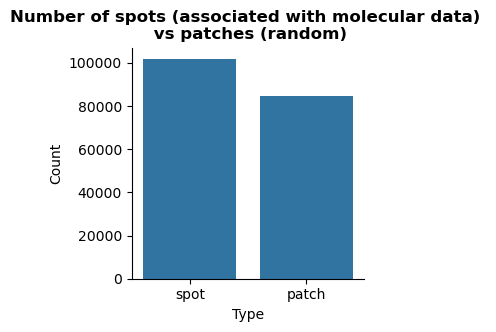

In [63]:
plt.figure(figsize=(3, 3))
sns.barplot(data=emb.obs["type"].value_counts().reset_index(), x="index", y="type")
sns.despine()
plt.title("Number of spots (associated with molecular data) \n vs patches (random)", weight='bold')
plt.ylabel("Count")
plt.xlabel("Type")

In [64]:
import sys
sys.path.append("../../")
from digitalhistopathology.datasets.real_datasets import TNBCDataset

dataset = TNBCDataset()

In [65]:
spots_labels.reset_index().sort_values("label")

,index,label
6,breast glands,51
5,cancer in situ,96
4,immune infiltrate,1873
3,adipose tissue,3716
2,invasive cancer,8419
1,connective tissue,30330
0,undetermined,57469


/tmp/ipykernel_1582152/11378139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_df, x="index", y="label", palette=palette, order=sorted_df["index"])


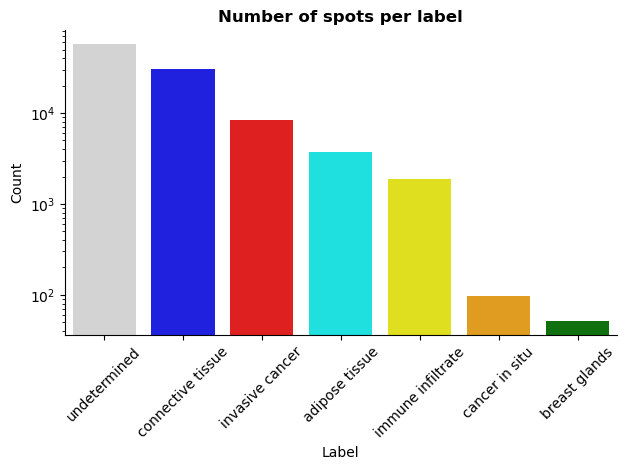

In [66]:
spots_labels = pd.DataFrame(emb.obs[emb.obs["type"] == "spot"]["label"].value_counts())
palette = dataset.PALETTE.copy()
palette["nan"] = "#FFFFFF"

# Sort by count (label column) in descending order
sorted_df = spots_labels.reset_index().sort_values("label", ascending=False)

# Plot with explicit order
sns.barplot(data=sorted_df, x="index", y="label", palette=palette, order=sorted_df["index"])
sns.despine()
sns.despine()
plt.title("Number of spots per label", weight='bold')
plt.ylabel("Count")
plt.yscale("log")
plt.xlabel("Label")
plt.xticks(rotation=45)
plt.tight_layout()

/tmp/ipykernel_1582152/2817275942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(emb.obs["knn_predicted_label"].value_counts(),


Text(0.5, 1.0, 'Number of spots per predicted label (KNN) \n whole dataset')

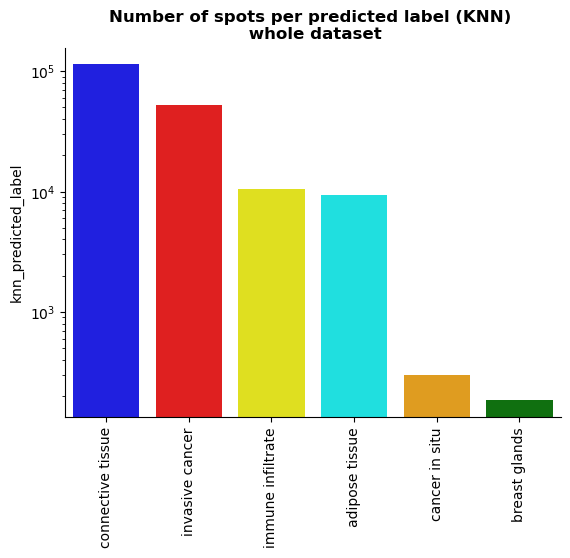

In [71]:
sns.barplot(emb.obs["knn_predicted_label"].value_counts(), 
            palette=palette, 
            order=emb.obs["knn_predicted_label"].value_counts().index)

sns.despine()
plt.xticks(rotation=90)
plt.yscale("log")
plt.title("Number of spots per predicted label (KNN) \n whole dataset", weight='bold')

In [68]:

reannotated = emb.obs[emb.obs["type"] == "spot"]
reannotated = reannotated[reannotated["label"] != "nan"]
reannotated = reannotated[reannotated["label"] != reannotated["knn_predicted_label"]]

/tmp/ipykernel_1582152/1525264747.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(reannotated["knn_predicted_label"].value_counts(),


Text(0, 0.5, 'Count')

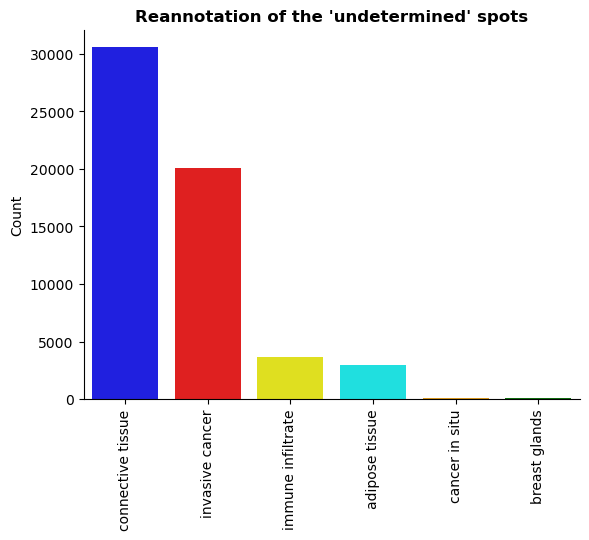

In [74]:

sns.barplot(reannotated["knn_predicted_label"].value_counts(),
            palette=palette, 
            order=reannotated["knn_predicted_label"].value_counts().index)
sns.despine()
plt.xticks(rotation=90)
plt.title("Reannotation of the 'undetermined' spots", weight='bold')
plt.ylabel("Count")

/tmp/ipykernel_1582152/4106076137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(patches["knn_predicted_label"].value_counts(),


Text(0.5, 1.0, 'Annotation of the random patches')

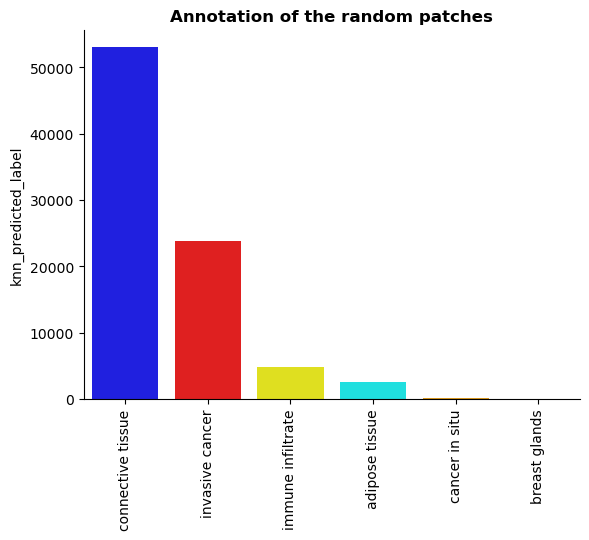

In [75]:
patches = emb.obs[emb.obs["type"] == "patch"]
sns.barplot(patches["knn_predicted_label"].value_counts(),
            palette=palette, 
            order=patches["knn_predicted_label"].value_counts().index)
sns.despine()
plt.xticks(rotation=90)
plt.title("Annotation of the random patches", weight='bold')

In [76]:
emb.obs

,path,mpp_height,mpp_width,shape_pixel,overlap_pixel,path_origin,name_origin,shape_origin,start_height_origin,start_width_origin,...,x_y,y_y,new_x_y,new_y_y,pixel_x_y,pixel_y_y,selected_y,label,knn_predicted_label,type
TNBC10_CN5_E1_patch000,/remote/idiap.svm/temp.genomics01/lfournier/re...,0.4,0.4,253,0.0,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC10_CN5_E1,"(31744, 31744, 3)",24288,20493,...,nan,nan,nan,nan,nan,nan,nan,nan,connective tissue,patch
TNBC10_CN5_E1_patch001,/remote/idiap.svm/temp.genomics01/lfournier/re...,0.4,0.4,253,0.0,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC10_CN5_E1,"(31744, 31744, 3)",27830,18722,...,nan,nan,nan,nan,nan,nan,nan,nan,connective tissue,patch
TNBC10_CN5_E1_patch002,/remote/idiap.svm/temp.genomics01/lfournier/re...,0.4,0.4,253,0.0,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC10_CN5_E1,"(31744, 31744, 3)",20999,23529,...,nan,nan,nan,nan,nan,nan,nan,nan,connective tissue,patch
TNBC10_CN5_E1_patch003,/remote/idiap.svm/temp.genomics01/lfournier/re...,0.4,0.4,253,0.0,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC10_CN5_E1,"(31744, 31744, 3)",7337,22264,...,nan,nan,nan,nan,nan,nan,nan,nan,connective tissue,patch
TNBC10_CN5_E1_patch004,/remote/idiap.svm/temp.genomics01/lfournier/re...,0.4,0.4,253,0.0,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC10_CN5_E1,"(31744, 31744, 3)",19734,25300,...,nan,nan,nan,nan,nan,nan,nan,nan,connective tissue,patch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TNBC9_spot9x53,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",23703,7205,...,9.0,53.0,8.99,53.04,7331.0,23829.666666666668,1.0,undetermined,connective tissue,spot
TNBC9_spot9x55,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",24498,7209,...,9.0,55.0,9.0,55.02,7335.333333333333,24624.0,1.0,undetermined,connective tissue,spot
TNBC9_spot9x57,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",25304,7202,...,9.0,57.0,8.98,57.03,7328.333333333333,25430.666666666668,1.0,undetermined,connective tissue,spot
TNBC9_spot9x59,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",26105,7206,...,9.0,59.0,8.99,59.03,7332.0,26231.666666666668,1.0,connective tissue,connective tissue,spot


In [84]:
emb.obs.loc["TNBC91_spot14x8"]

path                     /remote/idiap.svm/temp.genomics01/lfournier/re...
mpp_height                                                             nan
mpp_width                                                              nan
shape_pixel                                                            252
overlap_pixel                                                          nan
path_origin              /idiap/resource/database/ST_TNBC_v3/Images/ima...
name_origin                                                 TNBC91_CN46_C2
shape_origin                                             (31744, 31744, 3)
start_height_origin                                                   3899
start_width_origin                                                    9233
extension_origin                                                       jpg
batch                                                                     
tumor                                                               TNBC91
mean_intensity           

In [87]:
# Invasive dataset

invasive_dataset = emb.obs[emb.obs["knn_predicted_label"] == "invasive cancer"]


In [89]:
invasive_dataset_spots = invasive_dataset[invasive_dataset["type"] == "spot"]

In [91]:
invasive_dataset_spots_undetermined = invasive_dataset_spots[invasive_dataset_spots["label"] == "undetermined"]

In [92]:
invasive_dataset_spots_undetermined

,path,mpp_height,mpp_width,shape_pixel,overlap_pixel,path_origin,name_origin,shape_origin,start_height_origin,start_width_origin,...,x_y,y_y,new_x_y,new_y_y,pixel_x_y,pixel_y_y,selected_y,label,knn_predicted_label,type
TNBC11_spot10x14,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC11_CN6_C1,"(31744, 31744, 3)",5778,7578,...,10.0,14.0,10.06,13.96,7704.0,5904.0,1.0,undetermined,invasive cancer,spot
TNBC11_spot10x16,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC11_CN6_C1,"(31744, 31744, 3)",6578,7579,...,10.0,16.0,10.06,15.96,7705.0,6704.0,1.0,undetermined,invasive cancer,spot
TNBC11_spot10x20,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC11_CN6_C1,"(31744, 31744, 3)",8190,7577,...,10.0,20.0,10.05,19.98,7703.333333333333,8316.666666666666,1.0,undetermined,invasive cancer,spot
TNBC11_spot10x24,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC11_CN6_C1,"(31744, 31744, 3)",9795,7568,...,10.0,24.0,10.03,23.98,7694.0,9921.333333333334,1.0,undetermined,invasive cancer,spot
TNBC11_spot10x34,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC11_CN6_C1,"(31744, 31744, 3)",13807,7568,...,10.0,34.0,10.03,33.98,7694.0,13933.333333333334,1.0,undetermined,invasive cancer,spot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TNBC9_spot52x20,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",10458,22714,...,52.0,20.0,52.06,20.01,22840.0,10584.666666666666,1.0,undetermined,invasive cancer,spot
TNBC9_spot53x19,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",10065,23058,...,53.0,19.0,53.02,19.03,23184.666666666668,10191.666666666666,1.0,undetermined,invasive cancer,spot
TNBC9_spot6x26,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",12870,6130,...,6.0,26.0,6.0,26.02,6256.333333333333,12996.0,1.0,undetermined,invasive cancer,spot
TNBC9_spot7x21,/remote/idiap.svm/temp.genomics01/lfournier/re...,nan,nan,252,nan,/idiap/resource/database/ST_TNBC_v3/Images/ima...,TNBC9_CN5_D1,"(31744, 31744, 3)",10861,6493,...,7.0,21.0,7.01,21.01,6619.666666666667,10987.0,1.0,undetermined,invasive cancer,spot


In [99]:
cell_types = emb.obs["label"].unique()
cell_types = [ct for ct in cell_types if ct != "nan" and ct != "undetermined"]

In [140]:
proportions = labels.loc[invasive_dataset_spots_undetermined.index][cell_types]

proportions.replace("undetermined", 0, inplace=True)
proportions = proportions.astype(float)

proportions["max"] = proportions.idxmax(axis=1)
max_prop = proportions["max"].value_counts() / len(proportions)

print(f"In {len(proportions[proportions['invasive cancer'] > 0]) / len(proportions) * 100:.2f}% of the undetermined spots reannotated as invasive cancer, invasive cancer is present in the spot annotation.")
print(f"In {max_prop.loc['invasive cancer'] * 100:.2f}% of the undetermined spots reannotated as invasive cancer, invasive cancer is the most represented cell type in the spot annotation.")

In 80.62% of the undetermined spots reannotated as invasive cancer, invasive cancer is present in the spot annotation.
In 55.98% of the undetermined spots reannotated as invasive cancer, invasive cancer is the most represented cell type in the spot annotation.


/tmp/ipykernel_1582152/4078668024.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(proportions.median(),
/tmp/ipykernel_1582152/4078668024.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  order=proportions.median().sort_values(ascending=False).index)
/tmp/ipykernel_1582152/4078668024.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(proportions.median(),


Text(0, 0.5, 'Median proportion')

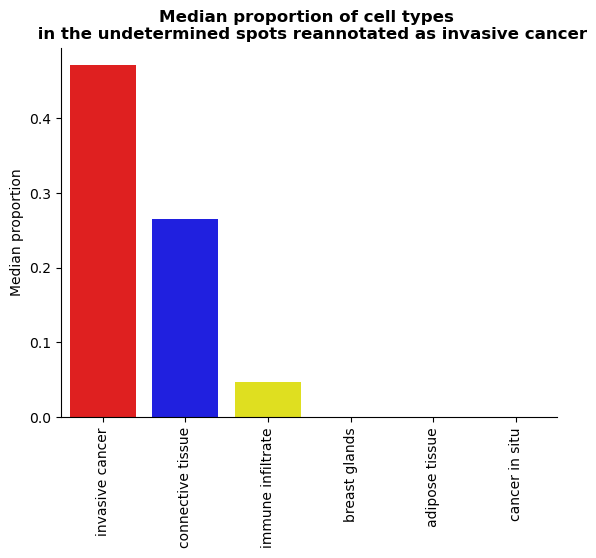

In [148]:
sns.barplot(proportions.median(),
            palette=palette, 
            order=proportions.median().sort_values(ascending=False).index)
sns.despine()
plt.xticks(rotation=90)
plt.title("Median proportion of cell types \n in the undetermined spots reannotated as invasive cancer", weight='bold')
plt.ylabel("Median proportion")

In [134]:
print(f"In {len(proportions[proportions['invasive cancer'] > 0]) / len(proportions) * 100:.2f}% of the undetermined spots reannotated as invasive cancer, invasive cancer is present in the spot annotation.")

In 80.62% of the undetermined spots reannotated as invasive cancer, invasive cancer is present in the spot annotation.


invasive cancer      0.559845
connective tissue    0.367973
immune infiltrate    0.069048
adipose tissue       0.002189
breast glands        0.000547
cancer in situ       0.000398
Name: max, dtype: float64

<Axes: ylabel='Density'>

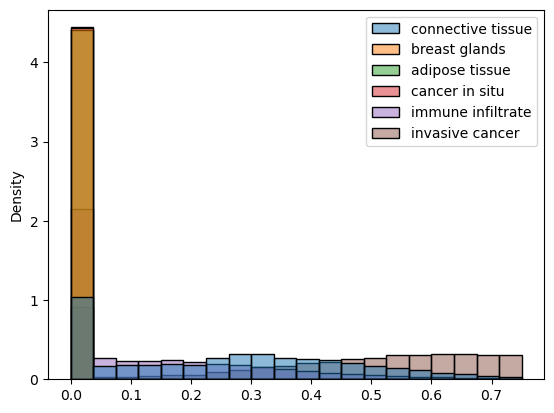

In [123]:
sns.histplot(proportions, stat='density', bins=20, alpha=0.5)

<Axes: xlabel='connective tissue', ylabel='Count'>

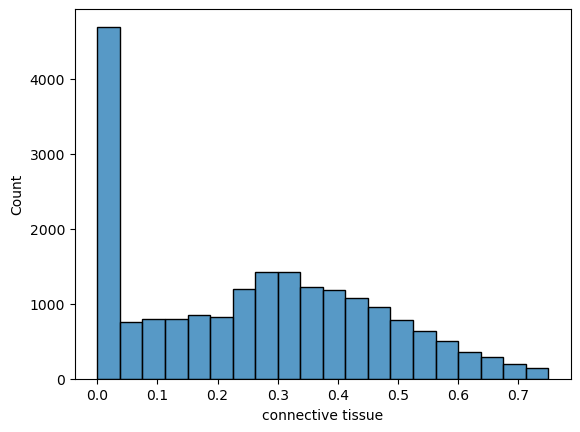

In [116]:
sns.histplot(proportions["connective tissue"], bins=20)